# Logistic Regression

- It is a method for classification.
- It allows us to solve classification problems, where we are trying to predict discrete categories.
- The convention for binary classification is to have two classes 0 and 1.
- Some examples of binary classification problems:
    - Spam vs Ham emails
    - Loan default (yes or no)
    - Disease Diagnisis

### Sigmoid (Logistic) Function

- The Sigmoid (aka Logistic) Function takes in any value and outputs it to be between 0 and 1.

### Part I - Exploring Data

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
train = pd.read_csv('../../90_datasets/titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [173]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

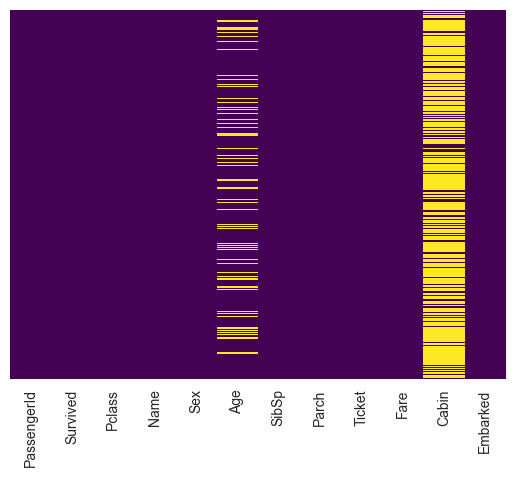

In [174]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
# we are missing some age and so many cabin information

In [175]:
sns.set_style('whitegrid')

<Axes: xlabel='Survived', ylabel='count'>

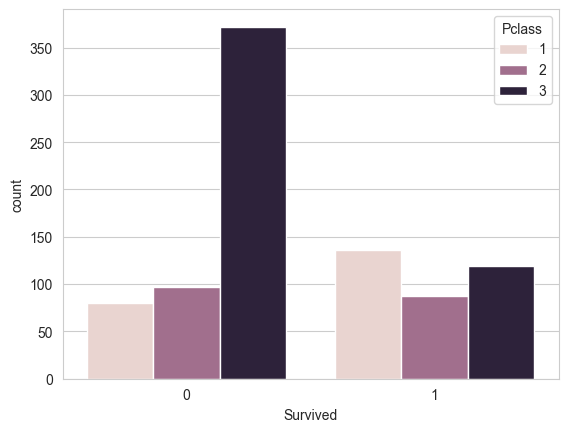

In [176]:
# sns.countplot(x='Survived', data=train, hue='Sex')
sns.countplot(x='Survived', data=train, hue='Pclass')

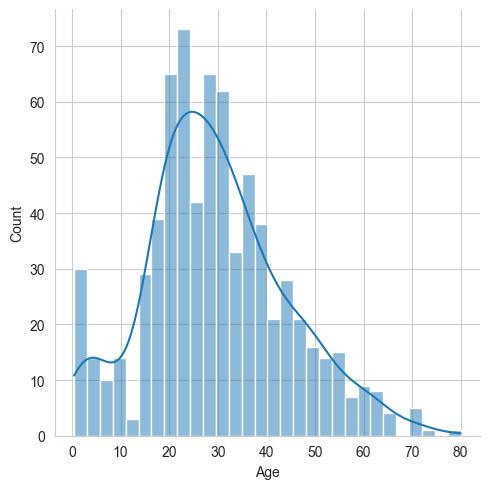

In [177]:
sns.displot(train['Age'].dropna(), kde=True, bins=30)

<Axes: xlabel='SibSp', ylabel='count'>

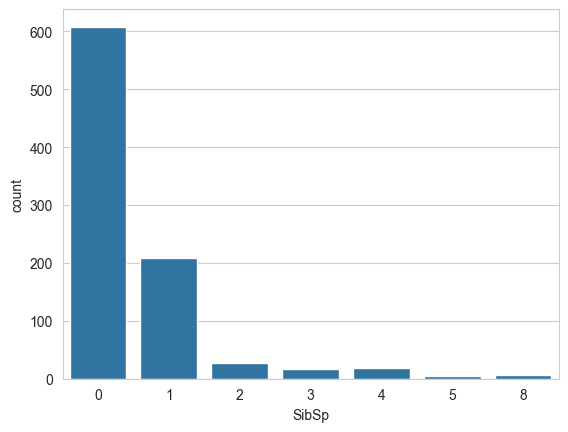

In [178]:
sns.countplot(x='SibSp', data=train)

<Axes: >

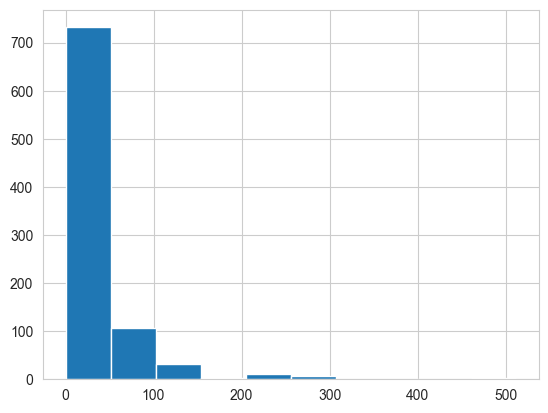

In [179]:
train['Fare'].hist()

In [180]:
import cufflinks as cf
cf.go_offline()

In [181]:
train['Fare'].iplot(kind='hist', bins=30)

## Part II - Cleaning Data

<Axes: xlabel='Pclass', ylabel='Age'>

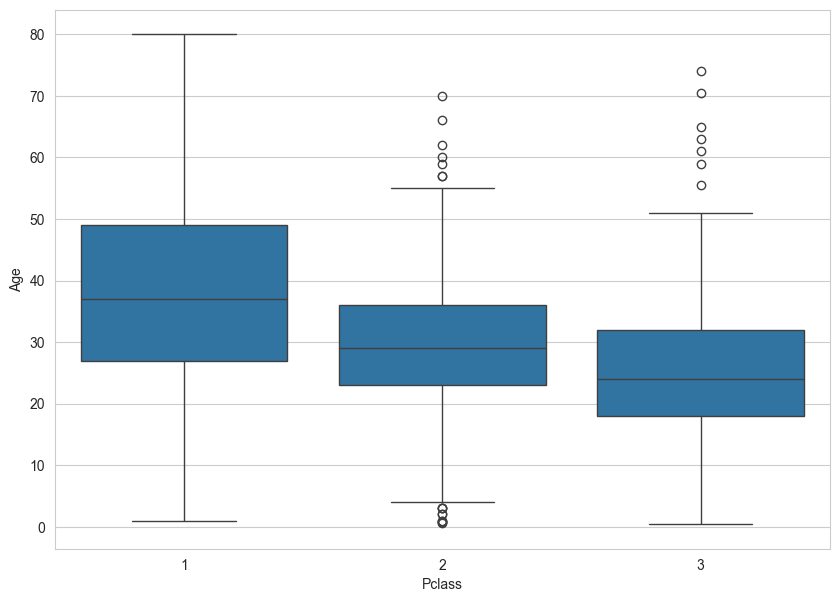

In [182]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='Pclass', y='Age', data=train)

In [183]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [184]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

C:\Users\Akumar5\AppData\Local\Temp\ipykernel_22684\3983263054.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\Akumar5\AppData\Local\Temp\ipykernel_22684\3983263054.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



<Axes: >

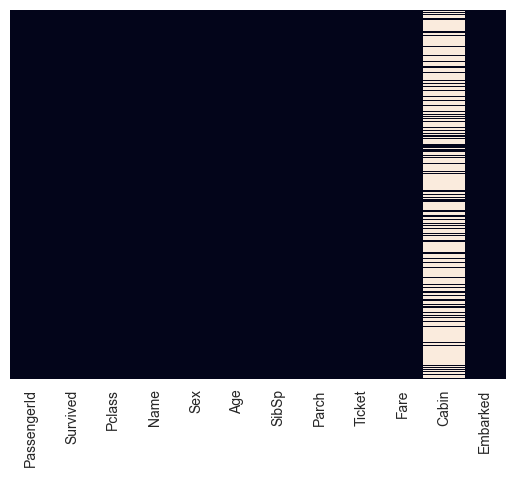

In [185]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

In [186]:
train.drop('Cabin', axis=1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [187]:
train.dropna(inplace=True)

In [188]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
sex.head()

,male
0,True
1,False
2,False
3,False
4,True


In [189]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)
embark.head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [190]:
train = pd.concat([train, sex, embark], axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True


In [191]:
train.drop(['Sex', 'Embarked', 'Name'], axis=1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,male,Q,S
0,1,0,3,22.0,1,0,A/5 21171,7.2500,True,False,True
1,2,1,1,38.0,1,0,PC 17599,71.2833,False,False,False
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,False,False,True
3,4,1,1,35.0,1,0,113803,53.1000,False,False,True
4,5,0,3,35.0,0,0,373450,8.0500,True,False,True


In [192]:
train.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,male,Q,S
886,887,0,2,27.0,0,0,211536,13.00,True,False,True
887,888,1,1,19.0,0,0,112053,30.00,False,False,True
888,889,0,3,24.0,1,2,W./C. 6607,23.45,False,False,True
889,890,1,1,26.0,0,0,111369,30.00,True,False,False
890,891,0,3,32.0,0,0,370376,7.75,True,True,False


In [193]:
train.drop(['PassengerId'], axis=1, inplace=True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,male,Q,S
0,0,3,22.0,1,0,A/5 21171,7.2500,True,False,True
1,1,1,38.0,1,0,PC 17599,71.2833,False,False,False
2,1,3,26.0,0,0,STON/O2. 3101282,7.9250,False,False,True
3,1,1,35.0,1,0,113803,53.1000,False,False,True
4,0,3,35.0,0,0,373450,8.0500,True,False,True


## Part III - Train & Build Model

In [194]:
X = train.drop(['Survived','Ticket'], axis=1)
y = train['Survived']

In [195]:
from sklearn.model_selection import train_test_split

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [197]:
from sklearn.linear_model import LogisticRegression

In [198]:
logmodel = LogisticRegression()

In [199]:
logmodel.fit(X_train, y_train)

C:\Users\Akumar5\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [200]:
predictions = logmodel.predict(X_test)

In [201]:
from sklearn.metrics import classification_report

In [202]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       166
           1       0.79      0.80      0.79       101

    accuracy                           0.84       267
   macro avg       0.83      0.83      0.83       267
weighted avg       0.84      0.84      0.84       267



In [203]:
from sklearn.metrics import confusion_matrix

In [204]:
confusion_matrix(y_test, predictions)

array([[144,  22],
       [ 20,  81]], dtype=int64)